## <font color = blue>1. Loading Data

In [1]:
#import libraries first
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("loan_train.csv")
df1

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [4]:
df1['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## <font color = blue> 2. Data manipulation with pandas
    
- Convert special character into np.nan
    
    
    
- Ensure all the columns are in expected types.

In [124]:
df1.replace('?', np.nan, inplace=True)

In [125]:
df1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [126]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [111]:
# df = loan_df.drop(["Loan_ID"],axis=1)
# df.head()


## <font color = blue> 3. Split dataset
    
    1.   Split the data to 80% training and 20% testing
    2.   Get the Estimator (ML algorithm aka learner)

`sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)`


In [129]:
from sklearn.model_selection import train_test_split
X1 = df1.iloc[:,:-1]
y1 = df1.Loan_Status

X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2,random_state=5,stratify=y1)
X1_train.head()

Loan_ID Gender Married Dependents Education Self_Employed  \
128  LP001451   Male     Yes          1  Graduate           Yes   
502  LP002615   Male     Yes          2  Graduate            No   
581  LP002893   Male      No          0  Graduate            No   
316  LP002035   Male     Yes          2  Graduate            No   
524  LP002697   Male      No          0  Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
128            10513             3850.0       160.0             180.0   
502             4865             5624.0       208.0             360.0   
581             1836            33837.0        90.0             360.0   
316             3717                0.0       120.0             360.0   
524             4680             2087.0         NaN             360.0   

     Credit_History Property_Area  
128             0.0         Urban  
502             1.0     Semiurban  
581             1.0         Urban  
316             1.0     Semiurban  
524             1.0     Semiurban

## <font color = blue> 4. Feature engineering with pipeline

In [113]:
#Pipeline is to create a sequence of preprocessing actions
from sklearn.pipeline import Pipeline

#SimpleImputer handles missing values
from sklearn.impute import SimpleImputer

#Standard Scaler normalise the numeric data so that large values does not
#create biasness in the training

#OneHotEndcoder converts categorical data to numerical, it also creates individual
#for each option in the categories
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [130]:
#Numeric columns
num_cols = X1.select_dtypes(include=['int64','float64']).columns
print(num_cols)

#categorical columns
cate_cols = X1.select_dtypes(include=['object']).columns
print(cate_cols)

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


###### `class sklearn.pipeline.Pipeline(steps, *, memory=None, verbose=False)`

`steps = list of (name,transform) tuple `

In [131]:
num_transformer = Pipeline(steps=
                       [
                           ('imputeN',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())
                       ])

cate_transformer = Pipeline(steps=
                       [
                           ('imputeC',SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot',OneHotEncoder(handle_unknown='ignore'))
                       ])


class sklearn.compose.ColumnTransformer(transformers, *, remainder='drop', 
sparse_threshold=0.3, n_jobs=None, transformer_weights=None, verbose=False,
verbose_feature_names_out=True)

transformers: List of (name, transformer, columns) tuples specifying the 
transformer objects to be applied to subsets of the data.

In [133]:
from sklearn.compose import ColumnTransformer

preprocessing1 = ColumnTransformer(transformers=
                       [
                           ('num',num_transformer,num_cols),
                           ('cate',cate_transformer,cate_cols)
                       ])


In [134]:
from sklearn.tree import DecisionTreeClassifier
estimator2 = DecisionTreeClassifier(criterion="entropy",max_depth=3)

In [119]:
# from sklearn.tree import DecisionTreeRegressor

# n_estimator = DecisionTreeRegressor(criterion = 'poisson')

In [135]:
mymodel1 = Pipeline(steps=
                  [
                      ('pre',preprocessing1),
                      ('est',estimator2)
                  ])

In [136]:
from sklearn import set_config
set_config(display='diagram')
mymodel1.fit(X1_train,y1_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cate',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object'))])),
                ('est',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3))])

In [137]:
y1_hat = mymodel1.predict(X1_test)

In [140]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import seaborn as sns

<AxesSubplot:>

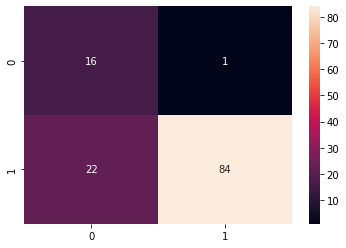

In [141]:

sns.heatmap(confusion_matrix(y1_hat,y1_test),annot=True)

In [142]:
report1 = classification_report(y1_test, y1_hat)
print("Report : \n{}".format(report1))

Report : 
              precision    recall  f1-score   support

           N       0.94      0.42      0.58        38
           Y       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123



In [143]:
sample1 = X1_test.iloc[0:1,:]
sample1

Loan_ID  Gender Married Dependents     Education Self_Employed  \
414  LP002335  Female     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
414             2149             3237.0       178.0             360.0   

     Credit_History Property_Area  
414             0.0     Semiurban

In [144]:
mymodel1.predict(sample1)[0]

'N'

In [147]:
 df1.iloc[414:415:]

Loan_ID  Gender Married Dependents     Education Self_Employed  \
414  LP002335  Female     Yes          0  Not Graduate            No   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
414             2149             3237.0       178.0             360.0   

     Credit_History Property_Area Loan_Status  
414             0.0     Semiurban           N

In [149]:
import pickle
pickle.dump(mymodel1,open("mymodel1.pkl","wb"))

In [150]:
 model1 = pickle.load(open("mymodel1.pkl","rb"))

In [151]:
 model1.score(X1_test,y1_test)

0.8130081300813008

In [152]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

criterion_param = ['entropy','gini']
max_depth_param = list(range(5,17,2))

#Pack these params into a dictionary
grid_params_tree = {
    'est__criterion' : criterion_param,
    'est__max_depth'   : max_depth_param,  
  }

gs_tree_pipeline1 = GridSearchCV(estimator=mymodel1,
                               param_grid = grid_params_tree,
                               scoring = 'accuracy',
                               cv = 10
                               )
gs_models1 = gs_tree_pipeline1.fit(X1_train, y1_train)

In [153]:
 gs_models1.best_estimator_

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputeN',
                                                                   SimpleImputer()),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cate',
                                                  Pipeline(steps=[('imputeC',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object'))])),
                ('est', DecisionTreeClassifier(max_depth=5))])

In [154]:
 gs_models1.best_params_

{'est__criterion': 'gini', 'est__max_depth': 5}

In [155]:
 y1_pred = gs_models1.best_estimator_.predict(X1_test)
print(y1_pred)

['N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'N'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y']


In [156]:
 report1 = classification_report(y1_test, y1_pred, target_names=['Y','N'])
print("Report : \n{}".format(report1))

Report : 
              precision    recall  f1-score   support

           Y       0.80      0.42      0.55        38
           N       0.79      0.95      0.86        85

    accuracy                           0.79       123
   macro avg       0.79      0.69      0.71       123
weighted avg       0.79      0.79      0.77       123



<AxesSubplot:>

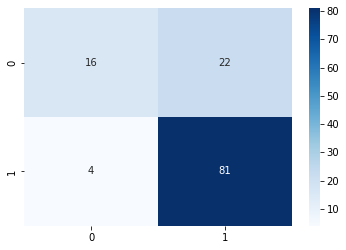

In [157]:
 cm = confusion_matrix(y1_test, y1_pred)
sns.heatmap(cm,annot=True,cmap='Blues')


In [158]:
pickle.dump(gs_models1.best_estimator_,open("gsmodel1.pkl",'wb'))

In [159]:
gsmodel1 = pickle.load(open("gsmodel1.pkl",'rb'))
gsmodel1.predict(sample1)

array(['N'], dtype=object)